In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import multivariate_normal
from prosail_wrappers import prosail_2d, prosail_3d, prosail_2d_transform, prosail_2d_L8, prosail_3d_L8
import scipy.io as sio
import copy
%matplotlib inline

In [2]:
def trunc_gauss_sample(N,means,stdevs,lims):
    data = np.zeros([N,len(means)])
    n = 0
    nor2d = multivariate_normal(means, np.diag(np.square(stdevs)) )
    while N > n:
        point = nor2d.rvs()
        if (lims[0,0] < point[0] < lims[0,1]) & (lims[1,0] < point[1] < lims[1,1]):
            data[n,:] = point
            n += 1
    return(data)

In [9]:
means = np.array([45,3.5])
stdevs = np.array([30,4.5])
lims = np.array([[20,90],[0,10]])
points = trunc_gauss_sample(5000,means,stdevs,lims)

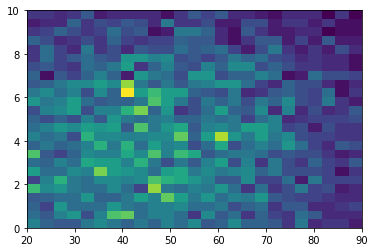

In [10]:
hist = plt.hist2d(points[:,0],points[:,1],bins=25)

In [11]:
import seaborn as sns
import pandas as pd

In [12]:
Ndata = 5000
X = trunc_gauss_sample(Ndata,means,stdevs,lims)
df = pd.DataFrame({'Chl':X[:,0], 'LAI':X[:,1]})

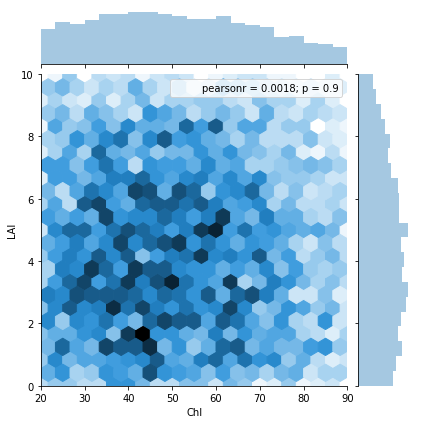

In [13]:
sns.jointplot(x="Chl", y="LAI", data=df, kind="hex");

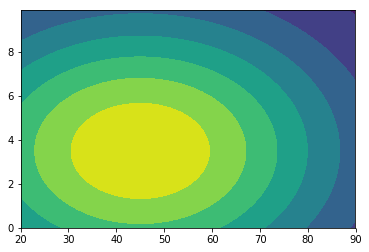

In [14]:
x, y = np.mgrid[20:90:.1, 0:10:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(means,  np.diag(np.square(stdevs)))
plt.contourf(x, y, rv.pdf(pos))

## Time to generate some prosail data with this truncated gauss distribution

In [15]:
Y = np.zeros([Ndata,9])
for i in range(Ndata):
    Y[i,:] = prosail_2d_L8( X[i,:].reshape(1,2) ).reshape(9,)

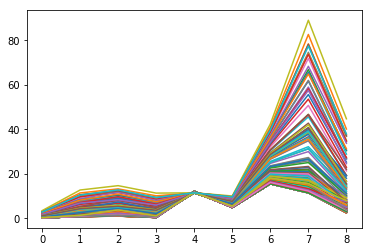

In [16]:
for i in range(Ndata):
    if i%20 == 0:
        plt.plot(Y[i,:])

In [17]:
prosail_L8_5000 = {'X':X, 'Y':Y}
with open('prosail_L8_5000.pickle', 'wb') as handle:
    pickle.dump(prosail_L8_5000, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Adding dry matter content to the mix! (has significant impact on the spectra)

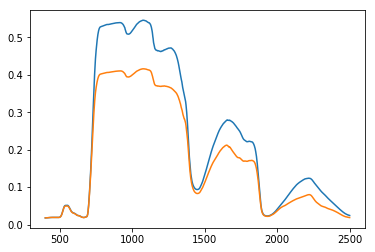

In [15]:
chl = 40;LAI=4;Cm=0.003;
plt.plot(np.linspace(400,2500,2101),prosail_3d(np.array([[chl,LAI,Cm]])))
chl = 40;LAI=4;Cm=0.011;
plt.plot(np.linspace(400,2500,2101),prosail_3d(np.array([[chl,LAI,Cm]])))

In [20]:
def trunc_gauss_sample_3d(N,means,stdevs,lims):
    data = np.zeros([N,len(means)])
    n = 0
    nor2d = multivariate_normal(means, np.diag(np.square(stdevs)) )
    while N > n:
        point = nor2d.rvs()
        if (lims[0,0] < point[0] < lims[0,1]) & (lims[1,0] < point[1] < lims[1,1]) & (lims[2,0] < point[2] < lims[2,1]):
            data[n,:] = point
            n += 1
    return(data)

In [25]:
means = np.array([45,3.5,0.005])
stdevs = np.array([30,4.5,0.005])
lims = np.array([[20,90],[0,10],[0.003,0.011]])
Ndata = 200000
X = trunc_gauss_sample_3d(Ndata,means,stdevs,lims)

In [27]:
Y = np.zeros([Ndata,9])
for i in range(Ndata):
    Y[i,:] = prosail_3d_L8( X[i,:].reshape(1,3) ).reshape(9,)

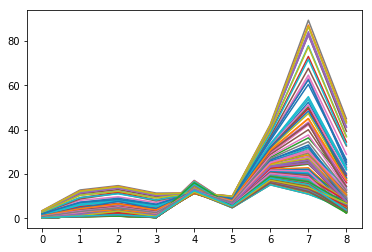

In [30]:
for i in range(Ndata):
    if i%800 == 0:
        plt.plot(Y[i,:])

In [31]:
prosail3d_L8_200000 = {'X':X, 'Y':Y}
with open('prosail3d_L8_200000.pickle', 'wb') as handle:
    pickle.dump(prosail3d_L8_200000, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
with open('L8response.pkl', 'rb') as handle:
    L8response = pickle.load(handle)

In [38]:
L8response['responsemat']

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [39]:
L8response['bands']

['CoastalAerosol',
 'Blue',
 'Green',
 'Red',
 'NIR',
 'Cirrus',
 'SWIR1',
 'SWIR2',
 'Pan']

In [42]:
swir2=L8response['responsemat'][7,:]

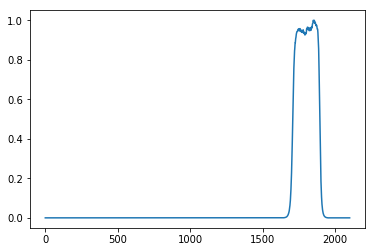

In [43]:
plt.plot(swir2)

In [44]:
sum(swir2)

181.13468399999982